## WWCode Days of Code Data Science Challenge 2024: Brand Sentiment Analysis Dataset (Twitter)
##### By: Angela Cao

#### Problem Objective: 
Use Exploratory Data Analysis (EDA) to explore the relationship between certain characteristics of the tweet (eg. individual tokens, token count, etc.) and the sentiment of the tweet. 

## Importing Datasets and Necessary Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brand-sentiment-analysis-dataset/Dataset - Train.csv
/kaggle/input/brand-sentiment-analysis-dataset/Dataset - Test.csv
/kaggle/input/brand-sentiment-analysis-dataset/Dataset Card.csv


## Cleaning Training Data and Generating Cleaning Techniques

#### Read in Training Dataset

In [2]:
train_df = pd.read_csv('/kaggle/input/brand-sentiment-analysis-dataset/Dataset - Train.csv')
train_df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
8584,Ipad everywhere. #SXSW {link},iPad,Positive emotion
8585,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
8586,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
8587,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


Original dataset has 8589 rows with each row representing a tweet and 3 columns of **tweet_text** (the tweet), **emotion_in_tweet_is_directed_at** (the subject of the certain tweet), and **is_there_an_emotion_directed_at_a_brand_or_product** (the sentiment of the tweet). 

#### Investigate Column Types

In [3]:
train_df.dtypes

tweet_text                                            object
emotion_in_tweet_is_directed_at                       object
is_there_an_emotion_directed_at_a_brand_or_product    object
dtype: object

#### Check for Null Values

In [4]:
train_df.isna().any()

tweet_text                                             True
emotion_in_tweet_is_directed_at                        True
is_there_an_emotion_directed_at_a_brand_or_product    False
dtype: bool

There are null values in **tweet_text** and **emotion_in_tweet_is_directed_at** while there are no null values in **is_there_an_emotion_directed_at_a_brand_or_product**. 

In this case (and considering the problem objective as well), it is easier to consider **is_there_an_emotion_directed_at_a_brand_or_product** as the variable that we are predicting of. 

In [5]:
train_df[train_df['tweet_text'].isna()]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
6,NaN,NaN,No emotion toward brand or product


The tweet where **tweet_text** is null (only one row), so it's fair that we can drop that particular row from our dataset. 

In [6]:
train_df[train_df['emotion_in_tweet_is_directed_at'].isna()]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
16,Holler Gram for iPad on the iTunes App Store -...,NaN,No emotion toward brand or product
32,"Attn: All #SXSW frineds, @mention Register fo...",NaN,No emotion toward brand or product
33,Anyone at #sxsw want to sell their old iPad?,NaN,No emotion toward brand or product
...,...,...,...
8583,"@mention Yup, but I don't have a third app yet...",NaN,No emotion toward brand or product
8585,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
8586,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
8587,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


All the rows where **emotion_in_tweet_is_directed_at** is null. 

Considering the number of rows where that particular feature is null (it is over half of the original dataset), it is fair to drop the feature/column from our dataset in the sometime future (as it is not a reliable predictive variable anymore). 

#### Drop Rows with Excessive Null Values

In [7]:
train_df.dropna(subset=['tweet_text'], inplace=True)
train_df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
8584,Ipad everywhere. #SXSW {link},iPad,Positive emotion
8585,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
8586,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
8587,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


#### Initial EDA 

Even though **emotion_in_tweet_is_directed_at** is not a reliable predictive variable as of now, it can somehow provide substantial insights for our problem objective as we can still explore if stronger sentiment has directed or if there are differing types of sentiment towards certain brands or products. 

##### All Brands or Products

In [8]:
import matplotlib.pyplot as plt
import plotly.express as px

sentiment = train_df.groupby('is_there_an_emotion_directed_at_a_brand_or_product').count()['tweet_text']
sentiment.name = 'Tweet Count'
fig = px.bar(sentiment, title='Distribution of is_there_an_emotion_directed_at_a_brand_or_product')
fig.update_yaxes(title='Frequency')
fig.show()

It seems like the majority of tweets don't have any emotion towards a certain brand or product, but there are more positive tweets than negative tweets present (in the data) so far. Nonetheless, it seems like most, if not all of the tweets, are certain in emotion. 

##### List of all brands or products mentioned in the dataset

In [9]:
train_df['emotion_in_tweet_is_directed_at'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', nan, 'Android',
       'Apple', 'Android App', 'Other Google product or service',
       'Other Apple product or service'], dtype=object)

##### Apple

In [10]:
apple_tweets = train_df[train_df['emotion_in_tweet_is_directed_at'] == 'Apple']
apple_sentiment = apple_tweets.groupby('is_there_an_emotion_directed_at_a_brand_or_product').count()['tweet_text']
apple_sentiment.name = 'Tweet Count'
fig = px.bar(apple_sentiment, title='Distribution of is_there_an_emotion_directed_at_a_brand_or_product for Apple')
fig.update_yaxes(title='Frequency')
fig.show()

The overwhelming majority of tweets directed to Apple (the company itself) are positive with still a considerable (but still fairly small) fraction that are negative with a very small percentage that are either neutral or unknown in emotion or sentiment. 

##### iPhone

In [11]:
iphone_tweets = train_df[train_df['emotion_in_tweet_is_directed_at'] == 'iPhone']
iphone_sentiment = iphone_tweets.groupby('is_there_an_emotion_directed_at_a_brand_or_product').count()['tweet_text']
iphone_sentiment.name = 'Tweet Count'
fig = px.bar(iphone_sentiment, title='Distribution of is_there_an_emotion_directed_at_a_brand_or_product for iPhone')
fig.update_yaxes(title='Frequency')
fig.show()

While the majority of tweets directed towards the iPhone are positive, there is still a good amount of tweets that are negative towards the iPhone (though still the minority of tweets nonetheless probably because compared to the other brands or products, there is a smaller fraction of tweets (overall) that are directed towards the iPhone) with a very small fraction that are either neutral or unknown in sentiment or emotion. 

##### iPad

In [12]:
ipad_tweets = train_df[train_df['emotion_in_tweet_is_directed_at'] == 'iPad']
ipad_sentiment = ipad_tweets.groupby('is_there_an_emotion_directed_at_a_brand_or_product').count()['tweet_text']
ipad_sentiment.name = 'Tweet Count'
fig = px.bar(ipad_sentiment, title='Distribution of is_there_an_emotion_directed_at_a_brand_or_product for iPad')
fig.update_yaxes(title='Frequency')
fig.show()

With the iPad having the largest proportion of Apple-related tweets directed towards to, it seems that the iPad is the most popular (or even most promoted in certain cases) or most-mentioned Apple product in the data (and even for all brands and products according to the data). It seems like the overwhelmingly majority of tweets directed towards the iPad are positive with still a small but considerable fraction of tweets towards the iPad as negative and a very small fraction of tweets towards the iPad as either neutral or unknown emotion. Surprisingly enough, there are way more tweets directed to the iPad (an Apple product itself) than the actual company, Apple itself. 

**Disclaimer:** "according to the data" may not mean or apply to all general situations. 

##### iPad or iPhone Apps

In [13]:
apple_app_tweets = train_df[train_df['emotion_in_tweet_is_directed_at'] == 'iPad or iPhone App']
apple_app_sentiment = apple_app_tweets.groupby('is_there_an_emotion_directed_at_a_brand_or_product').count()['tweet_text']
apple_app_sentiment.name = 'Tweet Count'
fig = px.bar(apple_app_sentiment, title='Distribution of is_there_an_emotion_directed_at_a_brand_or_product for iPad or iPhone App')
fig.update_yaxes(title='Frequency')
fig.show()

It seems that all the tweets directed towards an iPad or iPhone App are certain in emotion or sentiment. The overwhelming majority of tweets directed to an iPad or iPhone App are positive with still a small but still considerable fraction of negative tweets and a very small fraction of tweets that are neutral. 

##### Google

In [14]:
google_tweets = train_df[train_df['emotion_in_tweet_is_directed_at'] == 'Google']
google_sentiment = google_tweets.groupby('is_there_an_emotion_directed_at_a_brand_or_product').count()['tweet_text']
google_sentiment.name = 'Tweet Count'
fig = px.bar(google_sentiment, title='Distribution of is_there_an_emotion_directed_at_a_brand_or_product for Google')
fig.update_yaxes(title='Frequency')
fig.show()

Compared to Apple, it seems that there are less tweets directed towards Google (the company itself), but still somewhat follow similar distribution nonetheless. The overwhelming majority of tweets towards Google (the company itself) are still positive with still a considerable but small fraction of tweets that are negative and very small fraction that are either neutral or unknown in emotion or sentiment. Compared to its products, it seems like the company, itself, is more discussed than the products themselves. 

##### Android

In [15]:
android_tweets = train_df[train_df['emotion_in_tweet_is_directed_at'] == 'Android']
android_sentiment = android_tweets.groupby('is_there_an_emotion_directed_at_a_brand_or_product').count()['tweet_text']
android_sentiment.name = 'Tweet Count'
fig = px.bar(android_sentiment, title='Distribution of is_there_an_emotion_directed_at_a_brand_or_product for Android')
fig.update_yaxes(title='Frequency')
fig.show()

It seems that all of the tweets directed to Android are certain or known in emotion. The overwhelming majority of tweets towards the Android are positive while there is still a small fraction that is negative with a way smaller fraction that is neutral in emotion or sentiment. Also, compared to the iPhone or the iPad, there is a smaller proportion of tweets directed towards the Android which may suggest larger iPhone or iPad users than Android users according to the data. 

**Disclaimer:** "according to the data" may not mean or apply to all general situations. 

##### Android Apps

In [16]:
android_app_tweets = train_df[train_df['emotion_in_tweet_is_directed_at'] == 'Android App']
android_app_sentiment = android_app_tweets.groupby('is_there_an_emotion_directed_at_a_brand_or_product').count()['tweet_text']
android_app_sentiment.name = 'Tweet Count'
fig = px.bar(android_app_sentiment, title='Distribution of is_there_an_emotion_directed_at_a_brand_or_product for Android App')
fig.update_yaxes(title='Frequency')
fig.show()

Like the Android product itself, it seems here that all of the tweets directed to an Android app are certain or known in emotion with about similar distribution to the Android as well. The overwhelming majority of tweets directed towards an Android app are positive with still a way small fraction as negative and even a smaller fraction that is neutral towards an Android app. 

##### Other Google Product or Service

In [17]:
other_google_tweets = train_df[train_df['emotion_in_tweet_is_directed_at'] == 'Other Google product or service']
other_google_sentiment = other_google_tweets.groupby('is_there_an_emotion_directed_at_a_brand_or_product').count()['tweet_text']
other_google_sentiment.name = 'Tweet Count'
fig = px.bar(other_google_sentiment, title='Distribution of is_there_an_emotion_directed_at_a_brand_or_product for other Google product or service')
fig.update_yaxes(title='Frequency')
fig.show()

While still a smaller proportion than the Google company itself, other Google products or services have got more tweets than the Android or the Android apps themselves which can suggest that there is a good possibility that the Android and even the Android apps aren't the most popular (or even most promoted in certain cases) products offered by the company itself according to the data. The overwhelming majority of tweets directed towards another Google product or service are positive with still a considerable but still small fraction of tweets that are negative and then a way smaller fraction of tweets that are either neutral or unknown. 

**Disclaimer:** "according to the data" may not mean or apply to all general situations. 

##### Other Apple Product or Service

In [18]:
other_apple_tweets = train_df[train_df['emotion_in_tweet_is_directed_at'] == 'Other Apple product or service']
other_apple_sentiment = other_apple_tweets.groupby('is_there_an_emotion_directed_at_a_brand_or_product').count()['tweet_text']
other_apple_sentiment.name = 'Tweet Count'
fig = px.bar(other_apple_sentiment, title='Distribution of is_there_an_emotion_directed_at_a_brand_or_product for other Apple product or service')
fig.update_yaxes(title='Frequency')
fig.show()

It seems that all the tweets directed towards other Apple products or services are certain or known in emotion. With way less tweets towards other Apple products or services compared to the iPad or even the iPhone, it may suggest that the iPad and the iPhone with their apps are probably the most popular (or among the most popular or even the most promoted or among the most promoted in certain cases) Apple products according to the data. The overwhelming majority of tweets directed towards other Apple products or services are positive while very small fractions of tweets are negative and then neutral. 

**Disclaimer:** "according to the data" may not mean or apply to all general situations. 

##### No Brand or Product Specified

In [19]:
nan_tweets = train_df[train_df['emotion_in_tweet_is_directed_at'].isna()]
nan_sentiment = nan_tweets.groupby('is_there_an_emotion_directed_at_a_brand_or_product').count()['tweet_text']
nan_sentiment.name = 'Tweet Count'
fig = px.bar(nan_sentiment, title='Distribution of is_there_an_emotion_directed_at_a_brand_or_product for No Brand or Product Specified')
fig.update_yaxes(title='Frequency')
fig.show()

All the tweets that are not directed towards any brand or product listed in the data are neutral and take up a way larger proportion in the data(set) that any brand or product specified in the data which can justify on how the majority of tweets in the dataset overall are neutral. 

##### All Sentiments for all Brands or Products

In [20]:
direct = train_df.groupby('emotion_in_tweet_is_directed_at').count()['tweet_text']
direct.name = 'Tweet Count'
fig = px.bar(direct, title='Distribution of emotion_in_tweet_is_directed_at')
fig.update_yaxes(title='Frequency')
fig.show()

As stated before, the majority of tweets in the dataset where a specified brand or product is directed towards is the iPad. Following the iPad are Apple (the company itself) and an iPad or iPhone app. Apple and its associated products are more frequently discussed in this dataset compared to Google and its associated products. Although Google, the company itself, is directed more towards than the iPhone itself, the iPhone still gets more directed towards than the Android (Google's smartphone product). 

The most mentioned (most popular or promoted) Apple product is the iPad which even got more directed tweets than the company itself. According to the data, this can suggest that the iPad is either the most or among the most popular or promoted product associated with Apple. 

Other Google products or services are mentioned more than the Android or even the Android apps themselves. According to the data, this can suggest that the Android or even its apps may not be the most popular or among the most popular or promoted product associated with Google. 

The iPad is more directed towards to than the Apple company itself (which can suggest product popularity/promotion > brand popularity/promotion) while for Google, the company itself is more directed towards to than its products (which can suggest brand popularity/promotion > product popularity/promotion). 

**Disclaimer:** "according to the data" may not mean or apply to all general situations. 

##### Positive Emotion for all Brands or Products

In [21]:
positive_tweets = train_df[train_df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion']
positive_direct = positive_tweets.groupby('emotion_in_tweet_is_directed_at').count()['tweet_text']
positive_direct.name = 'Tweet Count'
fig = px.bar(positive_direct, title='Distribution of emotion_in_tweet_is_directed_at for Positive emotion')
fig.update_yaxes(title='Frequency')
fig.show()

As the iPad is the most popular brand or product according to the dataset and the overwhelming majority of tweets directed toward the iPad are positive, iPad will eventually take up the majority of positive tweets followed by Apple (the company itself) and iPad or iPhone app. As all products have (overwhelming) majority tweets as positive, the distribution of Positive emotion tweets are about similar more or less as in general as shown above (with the graph). 

**Disclaimer:** "according to the data" may not mean or apply to all general situations. 

##### Negative Emotion for all Brands or Products

In [22]:
negative_tweets = train_df[train_df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion']
negative_direct = negative_tweets.groupby('emotion_in_tweet_is_directed_at').count()['tweet_text']
negative_direct.name = 'Tweet Count'
fig = px.bar(negative_direct, title='Distribution of emotion_in_tweet_is_directed_at for Negative emotion')
fig.update_yaxes(title='Frequency')
fig.show()

The distribution of negative tweets is slightly different than that of positive tweets or even in general due to the differing amount of tweets directed towards each brand or product. As iPad has the majority of tweets directed towards in general, the majority of negative tweets would still be directed towards the iPad. However, while iPhone is somewhere in the middle in the number of tweets directed towards in general, it has the 2nd most negative tweets directed towards according to the data (however, the iPhone graph above does show that the fraction of negative tweets directed towards the iPhone is slightly more considerable than other products or brands though). 

**Disclaimer:** "according to the data" may not mean or apply to all general situations. 

##### No Emotion Toward Brand or Product (Neutral) for all Brands and Products

In [23]:
neutral_tweets = train_df[train_df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'No emotion toward brand or product']
neutral_direct = neutral_tweets.groupby('emotion_in_tweet_is_directed_at').count()['tweet_text']
neutral_direct.name = 'Tweet Count'
fig = px.bar(neutral_direct, title='Distribution of emotion_in_tweet_is_directed_at for No emotion toward brand or product')
fig.update_yaxes(title='Frequency')
fig.show()

As iPad takes up the majority of tweets in general, it will take up the majority of neutral tweets that directed towards a brand or product followed by Apple and then Google (the companies themselves). 

**Disclaimer:** "according to the data" may not mean or apply to all general situations. 

##### I can't tell (Unknown) for all Brands and Products

In [24]:
unknown_tweets = train_df[train_df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'I can\'t tell']
unknown_direct = unknown_tweets.groupby('emotion_in_tweet_is_directed_at').count()['tweet_text']
unknown_direct.name = 'Tweet Count'
fig = px.bar(unknown_direct, title='Distribution of emotion_in_tweet_is_directed_at for I can\'t tell')
fig.update_yaxes(title='Frequency')
fig.show()

As iPad takes up the majority of tweets in general and does have very few tweets where the emotion or sentiment in those tweets are unknown, iPad takes up the majority of tweets that are directed towards a certain brand or product and are of unknown or uncertain sentiment or emotion. Apple has the 2nd most tweets that are directed towards a certain brand or product and are of unknown or uncertain sentiment or emotion. Google, Other Google product or service, and iPhone each have 1 tweet directed towards a certain brand or product and are of unknown or uncertain sentiment or emotion.  

**Disclaimer:** "according to the data" may not mean or apply to all general situations. 

#### Drop Column(s) with Excessive Null Values

Keep original dataframe for safekeeping. :) 

In [25]:
train_df_copy = train_df.copy(deep=True)
train_df_copy

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
8584,Ipad everywhere. #SXSW {link},iPad,Positive emotion
8585,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
8586,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
8587,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


Since **emotion_in_tweet_is_directed_at** is not a reliable predictive variable anymore, drop the column/feature from the dataset. 

In [26]:
train_df.drop(['emotion_in_tweet_is_directed_at'], axis=1, inplace=True)
train_df

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion
...,...,...
8584,Ipad everywhere. #SXSW {link},Positive emotion
8585,"Wave, buzz... RT @mention We interrupt your re...",No emotion toward brand or product
8586,"Google's Zeiger, a physician never reported po...",No emotion toward brand or product
8587,Some Verizon iPhone customers complained their...,No emotion toward brand or product


#### NLP Data Cleaning and Wrangling
##### (and further Data Cleaning aka dropping null values)

##### Remove all user mentions (those that start with '@')

In [27]:
def remove_mention(tweet): 
    tweet = str(tweet)
    tokens = tweet.split(' ')
    new_tokens = []
    for token in tokens: 
        if token != '': 
            if '@' not in token: 
                new_tokens.append(token)
    new_tweet = ' '.join(new_tokens)
    return new_tweet 

train_df['tweet_text'] = train_df['tweet_text'].apply(remove_mention)
train_df

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,I have a 3G iPhone. After 3 hrs tweeting at #R...,Negative emotion
1,Know about ? Awesome iPad/iPhone app that you'...,Positive emotion
2,Can not wait for #iPad 2 also. They should sal...,Positive emotion
3,I hope this year's festival isn't as crashy as...,Negative emotion
4,great stuff on Fri #SXSW: Marissa Mayer (Googl...,Positive emotion
...,...,...
8584,Ipad everywhere. #SXSW {link},Positive emotion
8585,"Wave, buzz... RT We interrupt your regularly s...",No emotion toward brand or product
8586,"Google's Zeiger, a physician never reported po...",No emotion toward brand or product
8587,Some Verizon iPhone customers complained their...,No emotion toward brand or product


##### Expand Contractions into clearer tokens or words

In [28]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 10.7 MB/s eta 0:00:00


In [29]:
import contractions 

def expand_contractions(tweet): 
    tweet = str(tweet)
    tokens = tweet.split(' ')
    new_tokens = []
    for token in tokens: 
        token = contractions.fix(token)
        new_tokens.append(token)
    new_tweet = ' '.join(new_tokens)
    return new_tweet

train_df['tweet_text'] = train_df['tweet_text'].apply(expand_contractions)
train_df

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,I have a 3G iPhone. After 3 hrs tweeting at #R...,Negative emotion
1,Know about ? Awesome iPad/iPhone app that you ...,Positive emotion
2,Can not wait for #iPad 2 also. They should sal...,Positive emotion
3,I hope this year's festival is not as crashy a...,Negative emotion
4,great stuff on Fri #SXSW: Marissa Mayer (Googl...,Positive emotion
...,...,...
8584,Ipad everywhere. #SXSW {link},Positive emotion
8585,"Wave, buzz... RT We interrupt your regularly s...",No emotion toward brand or product
8586,"Google's Zeiger, a physician never reported po...",No emotion toward brand or product
8587,Some Verizon iPhone customers complained their...,No emotion toward brand or product


##### Punctuation Removal

In [30]:
def punc_removal(tweet): 
    tweet = str(tweet)
    tokens = tweet.split(' ')
    new_tokens = []
    for token in tokens: 
        token_list = list(token)
        i = 0 
        while i < len(token_list): 
            c = token_list[i]
            if c.isalnum() == False: 
                token_list.remove(c)
            else: 
                i += 1
        token = ''.join(token_list)
        new_tokens.append(token)
    new_tweet = ' '.join(new_tokens)
    return new_tweet

train_df['tweet_text'] = train_df['tweet_text'].apply(punc_removal)
train_df

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,I have a 3G iPhone After 3 hrs tweeting at RIS...,Negative emotion
1,Know about Awesome iPadiPhone app that you wi...,Positive emotion
2,Can not wait for iPad 2 also They should sale ...,Positive emotion
3,I hope this years festival is not as crashy as...,Negative emotion
4,great stuff on Fri SXSW Marissa Mayer Google T...,Positive emotion
...,...,...
8584,Ipad everywhere SXSW link,Positive emotion
8585,Wave buzz RT We interrupt your regularly sched...,No emotion toward brand or product
8586,Googles Zeiger a physician never reported pote...,No emotion toward brand or product
8587,Some Verizon iPhone customers complained their...,No emotion toward brand or product


##### Import additional libraries for NLP Data Cleaning

In [31]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


##### Stop Word Removal: remove all (too) common or step words

In [32]:
stop_list = stopwords.words('english')
stop_list.remove('against')
stop_list.remove('won')

def remove_stop_words(tweet): 
    tweet = str(tweet)
    tokens = tweet.split(' ')
    new_tokens = []
    for i in range(0, len(tokens)): 
        token = tokens[i]
        if token.lower() not in stop_list: 
            new_tokens.append(token)
    new_tweet = ' '.join(new_tokens)
    return new_tweet 

train_df['tweet_text'] = train_df['tweet_text'].apply(remove_stop_words)
train_df

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,3G iPhone 3 hrs tweeting RISEAustin dead need ...,Negative emotion
1,Know Awesome iPadiPhone app likely appreciate...,Positive emotion
2,wait iPad 2 also sale SXSW,Positive emotion
3,hope years festival crashy years iPhone app sxsw,Negative emotion
4,great stuff Fri SXSW Marissa Mayer Google Tim ...,Positive emotion
...,...,...
8584,Ipad everywhere SXSW link,Positive emotion
8585,Wave buzz RT interrupt regularly scheduled sxs...,No emotion toward brand or product
8586,Googles Zeiger physician never reported potent...,No emotion toward brand or product
8587,Verizon iPhone customers complained time fell ...,No emotion toward brand or product


##### Case Folding: lower case everything

In [33]:
def case_folding(tweet): 
    tweet = str(tweet)
    tokens = tweet.split(' ')
    new_tokens = []
    for token in tokens: 
        token = token.lower()
        new_tokens.append(token)
    new_tweet = ' '.join(new_tokens)
    return new_tweet 

train_df['tweet_text'] = train_df['tweet_text'].apply(case_folding)
train_df

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,3g iphone 3 hrs tweeting riseaustin dead need ...,Negative emotion
1,know awesome ipadiphone app likely appreciate...,Positive emotion
2,wait ipad 2 also sale sxsw,Positive emotion
3,hope years festival crashy years iphone app sxsw,Negative emotion
4,great stuff fri sxsw marissa mayer google tim ...,Positive emotion
...,...,...
8584,ipad everywhere sxsw link,Positive emotion
8585,wave buzz rt interrupt regularly scheduled sxs...,No emotion toward brand or product
8586,googles zeiger physician never reported potent...,No emotion toward brand or product
8587,verizon iphone customers complained time fell ...,No emotion toward brand or product


##### Number Removal

In [34]:
def remove_numbers(tweet): 
    tweet = str(tweet)
    tokens = tweet.split(' ')
    new_tokens = []
    for token in tokens: 
        # https://stackoverflow.com/questions/19859282/check-if-a-string-contains-a-number
        if any(char.isdigit() for char in token) == False: 
            new_tokens.append(token)
    new_tweet = ' '.join(new_tokens)
    return new_tweet 

train_df['tweet_text'] = train_df['tweet_text'].apply(remove_numbers)
train_df

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,iphone hrs tweeting riseaustin dead need upgra...,Negative emotion
1,know awesome ipadiphone app likely appreciate...,Positive emotion
2,wait ipad also sale sxsw,Positive emotion
3,hope years festival crashy years iphone app sxsw,Negative emotion
4,great stuff fri sxsw marissa mayer google tim ...,Positive emotion
...,...,...
8584,ipad everywhere sxsw link,Positive emotion
8585,wave buzz rt interrupt regularly scheduled sxs...,No emotion toward brand or product
8586,googles zeiger physician never reported potent...,No emotion toward brand or product
8587,verizon iphone customers complained time fell ...,No emotion toward brand or product


##### Link Removal

In [35]:
def remove_link(tweet): 
    tweet = str(tweet)
    tokens = tweet.split(' ')
    new_tokens = []
    for token in tokens: 
        if token != "link": 
            new_tokens.append(token)
    new_tweet = ' '.join(new_tokens)
    return new_tweet 

train_df['tweet_text'] = train_df['tweet_text'].apply(remove_link)
train_df

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,iphone hrs tweeting riseaustin dead need upgra...,Negative emotion
1,know awesome ipadiphone app likely appreciate...,Positive emotion
2,wait ipad also sale sxsw,Positive emotion
3,hope years festival crashy years iphone app sxsw,Negative emotion
4,great stuff fri sxsw marissa mayer google tim ...,Positive emotion
...,...,...
8584,ipad everywhere sxsw,Positive emotion
8585,wave buzz rt interrupt regularly scheduled sxs...,No emotion toward brand or product
8586,googles zeiger physician never reported potent...,No emotion toward brand or product
8587,verizon iphone customers complained time fell ...,No emotion toward brand or product


##### Stemming (Porter's algorithm): get to the root of the token
(because for some weird reason, lemmatization isn't working here :'))

In [36]:
def stemming(tweet): 
    stemmer = PorterStemmer()
    tweet = str(tweet)
    tokens = tweet.split(' ')
    new_tokens = []
    for token in tokens: 
        token = stemmer.stem(token)
        new_tokens.append(token)
    new_tweet = ' '.join(new_tokens)
    return new_tweet

train_df['tweet_text'] = train_df['tweet_text'].apply(stemming)
train_df

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,iphon hr tweet riseaustin dead need upgrad plu...,Negative emotion
1,know awesom ipadiphon app like appreci design...,Positive emotion
2,wait ipad also sale sxsw,Positive emotion
3,hope year festiv crashi year iphon app sxsw,Negative emotion
4,great stuff fri sxsw marissa mayer googl tim o...,Positive emotion
...,...,...
8584,ipad everywher sxsw,Positive emotion
8585,wave buzz rt interrupt regularli schedul sxsw ...,No emotion toward brand or product
8586,googl zeiger physician never report potenti ae...,No emotion toward brand or product
8587,verizon iphon custom complain time fell back h...,No emotion toward brand or product


##### One-Hot Encoding Tokens with CountVectorizer

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=2)
x_train_vec = vectorizer.fit_transform(train_df['tweet_text'])
# https://www.linkedin.com/pulse/count-vectorizers-vs-tfidf-natural-language-processing-sheel-saket/
# https://stackoverflow.com/questions/40370800/insert-result-of-sklearn-countvectorizer-in-a-pandas-dataframe
count_vect_df = pd.DataFrame(x_train_vec.todense(), columns=vectorizer.get_feature_names_out())
train_df = pd.concat([train_df, count_vect_df], axis=1)

In [38]:
train_df.drop(['tweet_text'], axis=1, inplace=True)
train_df

,is_there_an_emotion_directed_at_a_brand_or_product,aapl,aaron,ab,abil,abl,abnorm,absolut,absolutley,academi,...,zip,zlf,zm,zomb,zombi,zomg,zone,zoom,zuckerberg,zynga
0,Negative emotion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Positive emotion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Positive emotion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Negative emotion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Positive emotion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8585,No emotion toward brand or product,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8586,No emotion toward brand or product,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8587,No emotion toward brand or product,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8588,No emotion toward brand or product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Drop additional rows with excessive null values

In [39]:
train_df.dropna(inplace=True)
train_df

,is_there_an_emotion_directed_at_a_brand_or_product,aapl,aaron,ab,abil,abl,abnorm,absolut,absolutley,academi,...,zip,zlf,zm,zomb,zombi,zomg,zone,zoom,zuckerberg,zynga
0,Negative emotion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Positive emotion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Positive emotion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Negative emotion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Positive emotion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8583,No emotion toward brand or product,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8584,Positive emotion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8585,No emotion toward brand or product,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8586,No emotion toward brand or product,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Separate out Training Input and Output from each other

In [40]:
x_train_df = train_df.drop(['is_there_an_emotion_directed_at_a_brand_or_product'], axis=1)
x_train_df_cols = list(x_train_df.columns)
for col in x_train_df_cols: 
    x_train_df[col] = x_train_df[col].astype("Int64")
    train_df[col] = train_df[col].astype("Int64")
x_train_df

,aapl,aaron,ab,abil,abl,abnorm,absolut,absolutley,academi,acc,...,zip,zlf,zm,zomb,zombi,zomg,zone,zoom,zuckerberg,zynga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
y_train_df = train_df['is_there_an_emotion_directed_at_a_brand_or_product']
y_train_df

0                         Negative emotion
1                         Positive emotion
2                         Positive emotion
3                         Negative emotion
4                         Positive emotion
                       ...                
8583    No emotion toward brand or product
8584                      Positive emotion
8585    No emotion toward brand or product
8586    No emotion toward brand or product
8587    No emotion toward brand or product
Name: is_there_an_emotion_directed_at_a_brand_or_product, Length: 8587, dtype: object

In [42]:
train_df

,is_there_an_emotion_directed_at_a_brand_or_product,aapl,aaron,ab,abil,abl,abnorm,absolut,absolutley,academi,...,zip,zlf,zm,zomb,zombi,zomg,zone,zoom,zuckerberg,zynga
0,Negative emotion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Positive emotion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Positive emotion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Negative emotion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Positive emotion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8583,No emotion toward brand or product,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8584,Positive emotion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8585,No emotion toward brand or product,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8586,No emotion toward brand or product,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Cleaning Testing Data and Application of Cleaning Techniques

#### Read in Testing Dataset

In [43]:
test_df = pd.read_csv('/kaggle/input/brand-sentiment-analysis-dataset/Dataset - Test.csv')
test_df

,Tweet
0,Hand-Held ���Hobo�۪: Drafthouse launches ���Ho...
1,Again? RT @mention Line at the Apple store is ...
2,Boooo! RT @mention Flipboard is developing an ...
3,Thanks to @mention for publishing the news of ...
4,���@mention &quot;Apple has opened a pop-up st...
...,...
499,Hey is anyone doing #sxsw signing up for the g...
500,@mention you can buy my used iPad and I'll pic...
501,@mention You could buy a new iPad 2 tmrw at th...
502,"Guys, if you ever plan on attending #SXSW, you..."


#### Apply NLP Data Cleaning and Testing Techniques to Testing Data

In [44]:
test_df['Tweet'] = test_df['Tweet'].apply(remove_mention)
test_df['Tweet'] = test_df['Tweet'].apply(expand_contractions)
test_df['Tweet'] = test_df['Tweet'].apply(punc_removal)
test_df['Tweet'] = test_df['Tweet'].apply(remove_stop_words)
test_df['Tweet'] = test_df['Tweet'].apply(case_folding)
test_df['Tweet'] = test_df['Tweet'].apply(remove_numbers)
test_df['Tweet'] = test_df['Tweet'].apply(remove_link)
test_df['Tweet'] = test_df['Tweet'].apply(stemming)
test_df

,Tweet
0,handheld hobo drafthous launch hobo shotgun ip...
1,rt line appl store insan sxsw
2,boooo rt flipboard develop iphon version andro...
3,thank publish news new medic app sxswi conf bl...
4,quotappl open popup store austin nerd town sxs...
...,...
499,hey anyon sxsw sign group text app groupm got ...
500,buy use ipad pick one tomorrow sxsw
501,could buy new ipad tomorrow appl popup store sxsw
502,guy ever plan attend sxsw need thing skinni je...


In [45]:
x_test_vec = vectorizer.transform(test_df['Tweet'])
count_vect_test_df = pd.DataFrame(x_test_vec.todense(), columns=vectorizer.get_feature_names_out())
test_df = pd.concat([test_df, count_vect_test_df], axis=1)
test_df.drop(['Tweet'], axis=1, inplace=True)
test_df

,aapl,aaron,ab,abil,abl,abnorm,absolut,absolutley,academi,acc,...,zip,zlf,zm,zomb,zombi,zomg,zone,zoom,zuckerberg,zynga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Predictive Insights from EDA
### Day 1: Identify potential predictive variables
I used NLP data cleaning techniques and the CountVectorizer token vectorization technique to create one-hot encoded predictive categorical variables of indicators of the presence of a token in the corresponding tweet. 

### Day 2: Discuss how these variables could be used in a predictive model
Since there are 4260 predictive variables in the dataset, to reduce the complexity of the dataset, we can use feature selection techniques (such as VarianceThreshold and SelectKBest) to reduce the dataset to variables that would strongly predict the sentiment of the tweet. We can also use statistical methods to also get the features that most strongly predict the sentiment of the tweet as well. We can also use these same statistical methods or different statistical methods to also see predictive variables that are strongly associated with each other as well, and we can either drop one of the predictive associated variables (that is comparatively weaker in correlation to the output compared to the other for instance) or create a variable (possibly as substitution) that shows that strong association of these predictive variables. All of the predictive variables are categorical variables with 0 indicating as not present and 1 indicating present (in the tweet). 
Since dataset is so sparse (even using feature selection), we can use XGBoost as our predictive model. LightGBM and CatBoost are also good options as well. 

## Complex Data Patterns
### Day 3: Explore complex relationships in dataset

##### Complex relationships to explore
* Whether certain tokens strongly influence whether the tweet will be classified as positive or negative
* Whether certain tokens neutralize the tweet or not
* Whether certain tokens make the sentiment of the tweet clear or not
* Whether certain pair of tokens are strongly associated with each other

#### Exploring correlation between tokens and sentiment of tweet (positive vs negative)

In [46]:
import seaborn as sns

encoded_entries = train_df.copy(deep=True)
encoded_entries['is_there_an_emotion_directed_at_a_brand_or_product'] = encoded_entries['is_there_an_emotion_directed_at_a_brand_or_product'].map({'Positive emotion': 1, 'Negative emotion': -1, 'No emotion toward brand or product': 0, 'I can\'t tell': 0})
corr_matrix = encoded_entries.corr()

<Axes: >

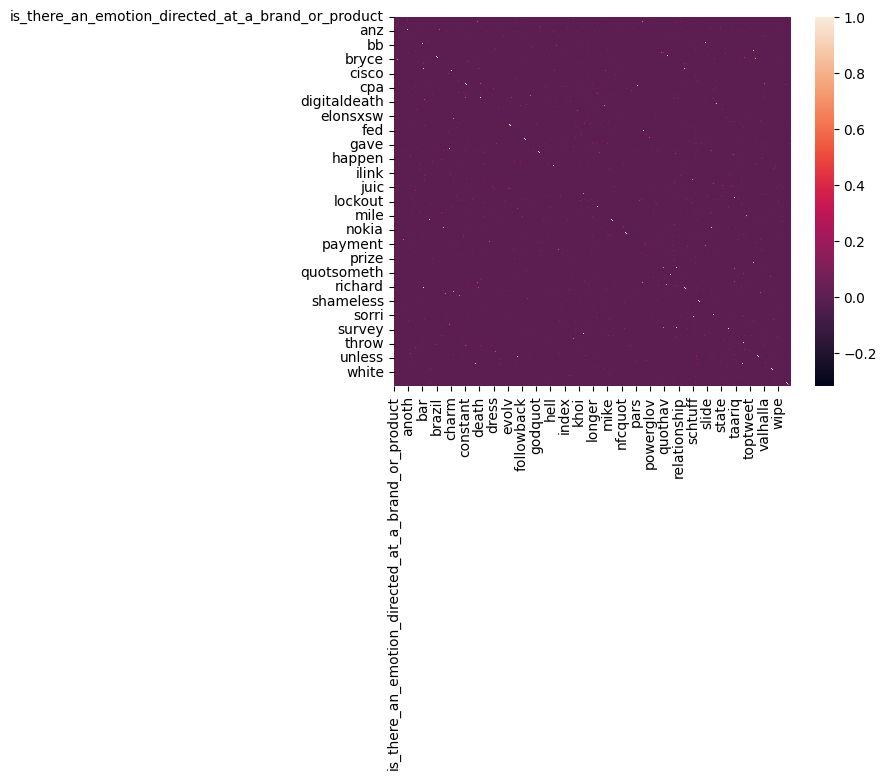

In [47]:
sns.heatmap(corr_matrix)

The correlation matrix as a heatmap. In a sea of purple that indicates little or no correlation (weak correlation), dots of lighter colors can indicate strong correlation among certain predictive variables. 

In [48]:
correlations = corr_matrix['is_there_an_emotion_directed_at_a_brand_or_product']
correlations

is_there_an_emotion_directed_at_a_brand_or_product    1.000000
aapl                                                  0.017770
aaron                                                 0.006847
ab                                                    0.006847
abil                                                  0.002779
                                                        ...   
zomg                                                 -0.001862
zone                                                  0.002779
zoom                                                  0.013994
zuckerberg                                           -0.006887
zynga                                                -0.019454
Name: is_there_an_emotion_directed_at_a_brand_or_product, Length: 4261, dtype: float64

In [49]:
positive_corr = correlations.nlargest(21)
positive_corr = positive_corr[1:]
positive_corr.name = 'Correlation Coefficient'
fig = px.bar(positive_corr, title='Top 20 tokens that correlate with positive emotion')
fig.update_xaxes(title='Token').update_yaxes(title='Coefficient Value')
fig.show()

Even with the most associated tokens towards sentiment, the correlation of individual tokens to sentiment is quite weak with no token that is positively correlated with positive emotion passing 0.07. Nonetheless, there is still some impact of the individual token to the tweet sentiment as shown in the graph above. 

In [50]:
negative_corr = correlations.nsmallest(20)
negative_corr.name = 'Correlation Coefficient'
fig = px.bar(negative_corr, title='Top 20 tokens that correlate with negative emotion', orientation='h')
fig.update_xaxes(title='Coefficient Value').update_yaxes(title='Token')
fig.show()

Even with the most associated tokens towards sentiment, the correlation of individual tokens to sentiment is quite weak with no token that is more associated or correlated with negative emotion passing -0.05. Nonetheless, there is still some impact of the individual token to the tweet sentiment as shown in the graph above. 

#### Exploring correlation between tokens and neutrality (aka 'No emotion toward brand or product') of tweet 

In [51]:
neutral_entries = train_df.copy(deep=True)
neutral_entries['is_there_an_emotion_directed_at_a_brand_or_product'] = neutral_entries['is_there_an_emotion_directed_at_a_brand_or_product'].map({'Positive emotion': 0, 'Negative emotion': 0, 'No emotion toward brand or product': 1, 'I can\'t tell': 0})
neutral_corr_matrix = neutral_entries.corr()

In [52]:
neutral_correlations = neutral_corr_matrix['is_there_an_emotion_directed_at_a_brand_or_product']
neutral_correlations

is_there_an_emotion_directed_at_a_brand_or_product    1.000000
aapl                                                 -0.027140
aaron                                                -0.004020
ab                                                   -0.004020
abil                                                  0.001520
                                                        ...   
zomg                                                  0.007284
zone                                                  0.001520
zoom                                                 -0.011368
zuckerberg                                            0.011764
zynga                                                 0.005476
Name: is_there_an_emotion_directed_at_a_brand_or_product, Length: 4261, dtype: float64

In [53]:
neutral_corr = neutral_correlations.nlargest(21)
neutral_corr = neutral_corr[1:]
neutral_corr.name = 'Correlation Coefficient'
fig = px.bar(neutral_corr, title='Top 20 tokens that correlate with neutral emotion')
fig.update_xaxes(title='Token').update_yaxes(title='Coefficient Value')
fig.show()

Even with the most associated tokens towards sentiment, the correlation of individual tokens to sentiment is quite weak with no token that is positively associated with neutrality or 'No emotion toward brand or product' passing 0.06. Nonetheless, there is still some impact of the individual token to the tweet sentiment as shown in the graph above. 

In [54]:
non_neutral_corr = neutral_correlations.nsmallest(20)
non_neutral_corr.name = 'Correlation Coefficient'
fig = px.bar(non_neutral_corr, title='Top 20 tokens that correlate with non-neutral emotion', orientation='h')
fig.update_xaxes(title='Coefficient Value').update_yaxes(title='Token')
fig.show()

Even with the most associated tokens towards sentiment, the correlation of individual tokens to sentiment is quite weak with no token that more associated or correlated with non-neutral emotion (positive/negative/(even) unknown) passing -0.06. Nonetheless, there is still some impact of the individual token to the tweet sentiment as shown in the graph above. 

#### Exploring correlation between tokens and unknown emotion (aka 'I can't tell') vs known/certain emotion of the tweet

In [55]:
unknown_entries = train_df.copy(deep=True)
unknown_entries['is_there_an_emotion_directed_at_a_brand_or_product'] = unknown_entries['is_there_an_emotion_directed_at_a_brand_or_product'].map({'Positive emotion': 0, 'Negative emotion': 0, 'No emotion toward brand or product': 0, 'I can\'t tell': 1})
unknown_corr_matrix = unknown_entries.corr()

In [56]:
unknown_correlations = unknown_corr_matrix['is_there_an_emotion_directed_at_a_brand_or_product']
unknown_correlations

is_there_an_emotion_directed_at_a_brand_or_product    1.000000
aapl                                                 -0.001049
aaron                                                -0.000494
ab                                                   -0.000494
abil                                                 -0.000606
                                                        ...   
zomg                                                 -0.000661
zone                                                 -0.000606
zoom                                                 -0.000606
zuckerberg                                           -0.000494
zynga                                                -0.000699
Name: is_there_an_emotion_directed_at_a_brand_or_product, Length: 4261, dtype: float64

In [57]:
unknown_corr = unknown_correlations.nlargest(21)
unknown_corr = unknown_corr[1:]
unknown_corr.name = 'Correlation Coefficient'
fig = px.bar(unknown_corr, title='Top 20 tokens that correlate with unknown emotion')
fig.update_xaxes(title='Token').update_yaxes(title='Coefficient Value')
fig.show()

For some reason, the (positive) correlation between certain tokens to unknown or uncertain emotion or sentiment is much stronger compared to the other sentiments (there are 5 tokens that pass 0.2), but nonetheless is still fairly weak (probably because of the number of tweets that are classified as "I can't tell" compared to other sentiments...which could either be a positive or negative thing depending on the situation). Nonetheless, there is still some impact of the individual token to the tweet sentiment as shown in the graph above. 

In [58]:
known_corr = unknown_correlations.nsmallest(20)
known_corr.name = 'Correlation Coefficient'
fig = px.bar(known_corr, title='Top 20 tokens that correlate with certain emotion', orientation='h')
fig.update_xaxes(title='Coefficient Value').update_yaxes(title='Token')
fig.show()

Even with the most associated tokens towards sentiment, the correlation of individual tokens to sentiment is quite weak with no token that is correlated with certain or known emotion passing -0.02. Nonetheless, there is still some impact of the individual token to the tweet sentiment as shown in the graph above. 

#### Exploring interactions among tokens together

In [59]:
token_corr_matrix = corr_matrix.drop(['is_there_an_emotion_directed_at_a_brand_or_product'], axis=1)
token_corr_matrix = token_corr_matrix.iloc[1:]
token_corr_matrix

,aapl,aaron,ab,abil,abl,abnorm,absolut,absolutley,academi,acc,...,zip,zlf,zm,zomb,zombi,zomg,zone,zoom,zuckerberg,zynga
aapl,1.000000,-0.000494,-0.000494,-0.000606,-0.002102,-0.000494,-0.000857,-0.000494,-0.000782,-0.001525,...,-0.000606,-0.001319,-0.000494,-0.001160,-0.000857,-0.000661,-0.000606,-0.000606,-0.000494,-0.000699
aaron,-0.000494,1.000000,-0.000233,-0.000285,-0.000990,-0.000233,-0.000404,-0.000233,-0.000368,-0.000719,...,-0.000285,-0.000622,-0.000233,-0.000547,-0.000404,-0.000311,-0.000285,-0.000285,-0.000233,-0.000329
ab,-0.000494,-0.000233,1.000000,-0.000285,-0.000990,-0.000233,-0.000404,-0.000233,-0.000368,-0.000719,...,-0.000285,-0.000622,-0.000233,-0.000547,-0.000404,-0.000311,-0.000285,-0.000285,-0.000233,-0.000329
abil,-0.000606,-0.000285,-0.000285,1.000000,-0.001213,-0.000285,-0.000494,-0.000285,-0.000451,-0.000880,...,-0.000349,-0.000761,-0.000285,-0.000670,-0.000494,-0.000381,-0.000349,-0.000349,-0.000285,-0.000404
abl,-0.002102,-0.000990,-0.000990,-0.001213,1.000000,-0.000990,-0.001716,-0.000990,-0.001566,-0.003055,...,-0.001213,-0.002643,-0.000990,-0.002324,-0.001716,-0.001324,-0.001213,0.095231,-0.000990,-0.001401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zomg,-0.000661,-0.000311,-0.000311,-0.000381,-0.001324,-0.000311,-0.000539,-0.000311,-0.000492,-0.000961,...,-0.000381,-0.000831,-0.000311,-0.000731,-0.000539,1.000000,-0.000381,-0.000381,-0.000311,-0.000440
zone,-0.000606,-0.000285,-0.000285,-0.000349,-0.001213,-0.000285,-0.000494,-0.000285,-0.000451,-0.000880,...,-0.000349,-0.000761,-0.000285,-0.000670,-0.000494,-0.000381,1.000000,-0.000349,-0.000285,-0.000404
zoom,-0.000606,-0.000285,-0.000285,-0.000349,0.095231,-0.000285,-0.000494,-0.000285,-0.000451,-0.000880,...,-0.000349,-0.000761,-0.000285,-0.000670,-0.000494,-0.000381,-0.000349,1.000000,-0.000285,-0.000404
zuckerberg,-0.000494,-0.000233,-0.000233,-0.000285,-0.000990,-0.000233,-0.000404,-0.000233,-0.000368,-0.000719,...,-0.000285,-0.000622,-0.000233,-0.000547,-0.000404,-0.000311,-0.000285,-0.000285,1.000000,-0.000329


<Axes: >

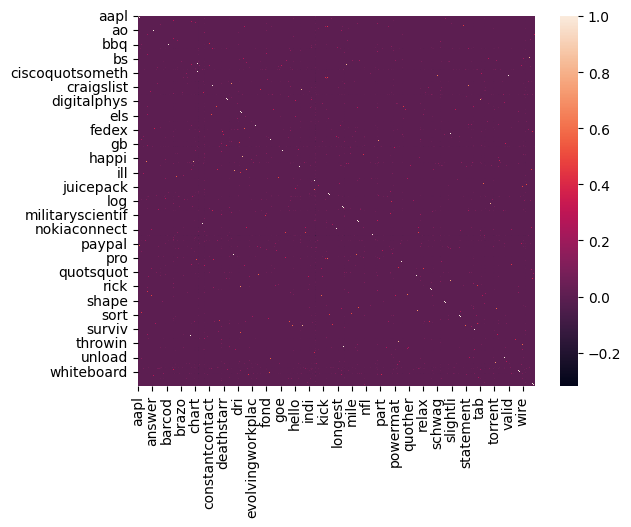

In [60]:
sns.heatmap(token_corr_matrix)

In the sea of purple (which indicates little to no correlation), the dots of lighter colors on the matrix indicate strong correlation among individual tokens together (aside correlation between same tokens together which is of course, 1.0 in correlation value). 

In [61]:
tokens_list = list(token_corr_matrix.index)
strongest_corr = {}

for i in range(0, len(tokens_list)):
    for k in range(0, len(tokens_list)):
        corr_val = token_corr_matrix.iloc[i, k]
        if (abs(corr_val) >= 0.8) and (corr_val != 1.0) and ((tokens_list[k], tokens_list[i]) not in strongest_corr): 
            token_pair = (tokens_list[i], tokens_list[k])
            strongest_corr[token_pair] = corr_val

strongest_corr = sorted(strongest_corr.items(), key=lambda x:x[1], reverse=True)
strongest_corr[:20]

[(('uberguid', 'ubersoci'), 0.9919735601373372),
 (('musedchat', 'newtwitt'), 0.9855531410855324),
 (('interrupt', 'regularli'), 0.97973868442471),
 (('quotthink', 'tweetquot'), 0.9769513909781207),
 (('quotgroupon', 'socialtypequot'), 0.9681893576626331),
 (('edchat', 'musedchat'), 0.9595465235183335),
 (('mark', 'tweetquot'), 0.9554215298859241),
 (('extraordinari', 'leagu'), 0.9544287003131153),
 (('deleg', 'novelti'), 0.9534070051029911),
 (('campbel', 'naomi'), 0.9486556634127171),
 (('infektd', 'valid'), 0.9482118119859875),
 (('edchat', 'newtwitt'), 0.9456840902711989),
 (('bread', 'revolutionari'), 0.9427968397182597),
 (('mtg', 'voluntari'), 0.9427968397182597),
 (('kiiiiiill', 'piss'), 0.9427968397182592),
 (('fandango', 'karaok'), 0.9427968397182591),
 (('fandango', 'tkt'), 0.9427968397182591),
 (('defin', 'quottranspar'), 0.942796839718259),
 (('defin', 'therebi'), 0.942796839718259),
 (('augment', 'realiti'), 0.9382008945145455)]

Text(0.5, 1.0, 'Top 20 bigram correlation')

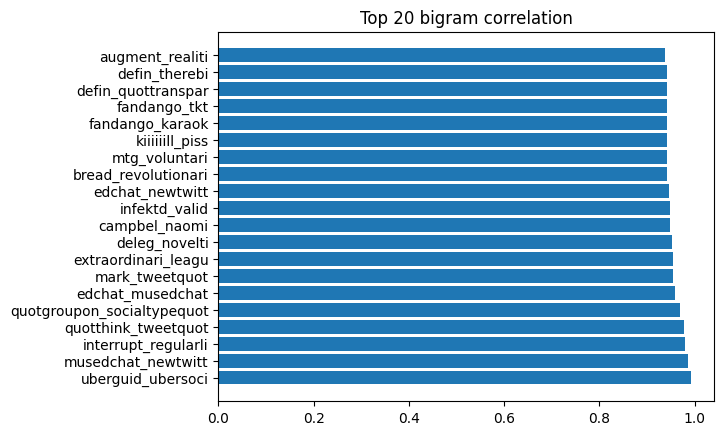

In [62]:
top_20 = dict(strongest_corr[:20])
top_20_two = {}
for pair in top_20: 
    pair_str = pair[0] + '_' + pair[1]
    top_20_two[pair_str] = top_20[pair]
plt.barh(y=list(top_20_two.keys()), width=list(top_20_two.values()))
plt.title("Top 20 bigram correlation")

There are definitely pairs of tokens that are very strongly correlated to each other which can indicate that these pair of tokens often appear in the same tweet together with very similar or same sentiment more or less or are associated with the same sentiment (more or less). Some feature selection probably has to be done in order to reduce dependence among predictive variables. 

### Day 4: Use advanced visualization techniques to reveal deeper insights
#### (and continue to explore complex relationships in dataset)

#### More complex relationships to explore
* Most frequent tokens overall and each sentiment
* Number of tokens in the tweet 
* Whether similarity among tweets can predict sentiment

In [63]:
positive_entries = train_df[train_df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion']
positive_entries.drop(['is_there_an_emotion_directed_at_a_brand_or_product'], axis=1, inplace=True)

/tmp/ipykernel_18/659219318.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
negative_entries = train_df[train_df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion']
negative_entries.drop(['is_there_an_emotion_directed_at_a_brand_or_product'], axis=1, inplace=True)

/tmp/ipykernel_18/2194207584.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [65]:
neutral_entries = train_df[train_df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'No emotion toward brand or product']
neutral_entries.drop(['is_there_an_emotion_directed_at_a_brand_or_product'], axis=1, inplace=True)

/tmp/ipykernel_18/932171618.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
non_neutral_entries = train_df[train_df['is_there_an_emotion_directed_at_a_brand_or_product'] != 'No emotion toward brand or product']
non_neutral_entries.drop(['is_there_an_emotion_directed_at_a_brand_or_product'], axis=1, inplace=True)

/tmp/ipykernel_18/2622514412.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
unknown_entries = train_df[train_df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'I can\'t tell']
unknown_entries.drop(['is_there_an_emotion_directed_at_a_brand_or_product'], axis=1, inplace=True)

/tmp/ipykernel_18/1841151853.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [68]:
known_entries = train_df[train_df['is_there_an_emotion_directed_at_a_brand_or_product'] != 'I can\'t tell']
known_entries.drop(['is_there_an_emotion_directed_at_a_brand_or_product'], axis=1, inplace=True)

/tmp/ipykernel_18/4171657836.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Funnel Chart to explore Token Frequency Overall

In [69]:
token_sum = x_train_df.sum()
largest_20_overall = token_sum.nlargest(20)
largest_20_overall

sxsw       8954
rt         2780
ipad       2368
googl      2363
appl       2139
store      1432
iphon      1425
new        1035
app         969
austin      917
launch      795
amp         697
social      604
circl       592
popup       571
today       548
android     533
open        516
get         508
network     458
dtype: int64

In [70]:
import plotly.express as px 
data = dict(
    tweets = list(largest_20_overall.values), 
    token = list(largest_20_overall.index)
)
fig = px.funnel(data, x='tweets', y='token', title='Top 20 Tokens by Frequency')
fig.show()

The token "sxsw" takes up the vast and overwhelming majority followed by "rt", "ipad", "googl", and "appl" which can indicate that most, if not all, tweets are of SXSW-themed (SXSW is an entertainment festival that takes place annually in Austin, TX (the token "austin" is also the among the most frequent as well)), and confirms that much of the tweets in the data are Apple- or Google- associated with the most popular or mentioned specified product as the iPad. 

#### Funnel Chart to explore Token Frequency for Positive vs Negative Sentiment

In [71]:
positive_token_sum = positive_entries.sum()
largest_20_positive = positive_token_sum.nlargest(20)
largest_20_positive

sxsw       2797
rt          798
ipad        787
appl        692
googl       661
store       457
iphon       455
app         330
new         295
austin      292
launch      211
amp         206
popup       180
android     173
get         168
open        150
circl       140
social      138
today       138
via         137
dtype: int64

In [72]:
negative_token_sum = negative_entries.sum()
largest_20_negative = negative_token_sum.nlargest(20)
largest_20_negative

sxsw       549
ipad       146
googl      140
rt         131
appl       130
iphon      108
store       87
new         59
app         49
austin      48
launch      36
android     31
amp         30
popup       30
social      30
today       30
circl       29
use         28
like        27
line        26
dtype: int64

In [73]:
positive_tokens_list = list(largest_20_positive.index)
negative_tokens_list = list(largest_20_negative.index)

overall_list = list(set(positive_tokens_list + negative_tokens_list))

positive_token_values = []
negative_token_values = []

for token in overall_list: 
    if token in largest_20_positive: 
        positive_token_values.append(largest_20_positive[token])
    else: 
        positive_token_values.append(0)
    if token in largest_20_negative: 
        negative_token_values.append(largest_20_negative[token])
    else: 
        negative_token_values.append(0)
        
positive_tokens_funnel_df = pd.DataFrame(dict(tweets = positive_token_values, token = overall_list))
positive_tokens_funnel_df['is_there_an_emotion_directed_at_a_brand_or_product'] = 'Positive emotion'
negative_tokens_funnel_df = pd.DataFrame(dict(tweets = negative_token_values, token = overall_list))
negative_tokens_funnel_df['is_there_an_emotion_directed_at_a_brand_or_product'] = 'Negative emotion'
tokens_funnel_df = pd.concat([positive_tokens_funnel_df, negative_tokens_funnel_df], axis=0)
fig = px.funnel(tokens_funnel_df, x='tweets', y='token', color='is_there_an_emotion_directed_at_a_brand_or_product', title='Top Positive vs Negative Associated Tokens by Frequency')
fig.show()

For both positive and negative tweets, "sxsw" is the most frequent token (just like in general). However, "get", "via", and "open" are the most frequent tokens for positive tweets while "use", "line", and "like" are the most frequent tokens for negative tweets. 

#### Funnel Chart to explore Token Frequency for Neutral vs Non-Neutral Sentiment

In [74]:
neutral_token_sum = neutral_entries.sum()
largest_20_neutral = neutral_token_sum.nlargest(20)
largest_20_neutral

sxsw       5599
rt         1850
googl      1562
ipad       1432
appl       1315
store       886
iphon       859
new         681
app         590
austin      577
launch      548
amp         460
social      436
circl       423
today       379
popup       358
open        342
android     329
network     323
get         316
dtype: int64

In [75]:
non_neutral_token_sum = non_neutral_entries.sum()
largest_20_non_neutral = non_neutral_token_sum.nlargest(20)
largest_20_non_neutral

sxsw       3355
ipad        936
rt          930
appl        824
googl       801
iphon       566
store       546
app         379
new         354
austin      340
launch      247
amp         237
popup       213
android     204
get         192
open        174
circl       169
today       169
social      168
via         155
dtype: int64

In [76]:
neutral_tokens_list = list(largest_20_neutral.index)
non_neutral_tokens_list = list(largest_20_non_neutral.index)

overall_list = list(set(neutral_tokens_list + non_neutral_tokens_list))

neutral_token_values = []
non_neutral_token_values = []

for token in overall_list: 
    if token in largest_20_neutral: 
        neutral_token_values.append(largest_20_neutral[token])
    else: 
        neutral_token_values.append(0)
    if token in largest_20_non_neutral: 
        non_neutral_token_values.append(largest_20_non_neutral[token])
    else: 
        non_neutral_token_values.append(0)
        
neutral_tokens_funnel_df = pd.DataFrame(dict(tweets = neutral_token_values, token = overall_list))
neutral_tokens_funnel_df['is_there_an_emotion_directed_at_a_brand_or_product'] = 'No emotion toward brand or product'
non_neutral_tokens_funnel_df = pd.DataFrame(dict(tweets = non_neutral_token_values, token = overall_list))
non_neutral_tokens_funnel_df['is_there_an_emotion_directed_at_a_brand_or_product'] = 'Emotion toward brand or product'
tokens_funnel_df = pd.concat([neutral_tokens_funnel_df, non_neutral_tokens_funnel_df], axis=0)
fig = px.funnel(tokens_funnel_df, x='tweets', y='token', color='is_there_an_emotion_directed_at_a_brand_or_product', title='Top Neutral vs Non-Neutral Associated Tokens by Frequency')
fig.show()

As "sxsw" is the most frequent token in general, it is also the most frequent token for both neutral and non-neutral tweets. However, for non-neutral tweets, "via" is among the top tokens while "network" appears to be amongst the top (tokens) for neutral tweets. 

#### Funnel Chart to explore Token Frequency for Unknown vs Known/Certain Sentiment

In [77]:
unknown_token_sum = unknown_entries.sum()
largest_20_unknown = unknown_token_sum.nlargest(20)
largest_20_unknown

sxsw         9
ipad         3
iphon        3
popup        3
appl         2
store        2
take         2
abl          1
afford       1
america      1
amp          1
announc      1
attend       1
brilliant    1
buy          1
cannot       1
carlson      1
catch        1
charg        1
compani      1
dtype: int64

In [78]:
known_token_sum = known_entries.sum()
largest_20_known = known_token_sum.nlargest(20)
largest_20_known

sxsw       8945
rt         2779
ipad       2365
googl      2363
appl       2137
store      1430
iphon      1422
new        1035
app         969
austin      917
launch      795
amp         696
social      604
circl       592
popup       568
today       547
android     533
open        516
get         508
network     458
dtype: int64

In [79]:
unknown_tokens_list = list(largest_20_unknown.index)
known_tokens_list = list(largest_20_known.index)

overall_list = list(set(unknown_tokens_list + known_tokens_list))

unknown_token_values = []
known_token_values = []

for token in overall_list: 
    if token in largest_20_unknown: 
        unknown_token_values.append(largest_20_unknown[token])
    else: 
        unknown_token_values.append(0)
    if token in largest_20_known: 
        known_token_values.append(largest_20_known[token])
    else: 
        known_token_values.append(0)
        
unknown_tokens_funnel_df = pd.DataFrame(dict(tweets = unknown_token_values, token = overall_list))
unknown_tokens_funnel_df['is_there_an_emotion_directed_at_a_brand_or_product'] = 'I can\'t tell'
known_tokens_funnel_df = pd.DataFrame(dict(tweets = known_token_values, token = overall_list))
known_tokens_funnel_df['is_there_an_emotion_directed_at_a_brand_or_product'] = 'Can tell'
tokens_funnel_df = pd.concat([unknown_tokens_funnel_df, known_tokens_funnel_df], axis=0)
fig = px.funnel(tokens_funnel_df, x='tweets', y='token', color='is_there_an_emotion_directed_at_a_brand_or_product', title='Top Unknown vs Known/Certain Sentiment Associated Tokens by Frequency ')
fig.show()

As "swsx" is the most frequent token for all tokens, it is also the most frequent token for both unknown and known sentiment tweets as well. However, there are certain tokens that are more specific and specifically show up in tweets of unknown sentiment. Also, probably due to the number of tweets that are of known/certain sentiment vs unknown/uncertain sentiment, there are certain tokens, as shown above, where tweets of known/certain sentiment are the overwhelming majority. 

#### Interactive Histogram to Explore Token Count for Every Categorical Class of 'is_there_an_emotion_directed_at_a_brand_or_product'

In [80]:
positive_tweets_token_count = positive_entries.sum(axis=1)
positive_tweets_token_count.name = 'Token Count'
fig = px.histogram(positive_tweets_token_count, title='Token Count for Positive Tweets')
fig.update_xaxes(title='Token Count').update_yaxes(title='Frequency')
fig.show()

The distribution of token count for positive tweets is fairly normal. Based on the graph above, it seems that the median and mean token count for positive tweets is about the same more or less (around 10). 

In [81]:
negative_tweets_token_count = negative_entries.sum(axis=1)
negative_tweets_token_count.name = 'Token Count'
fig = px.histogram(negative_tweets_token_count, title='Token Count for Negative Tweets')
fig.update_xaxes(title='Token Count').update_yaxes(title='Frequency')
fig.show()

Based on the graph above, it seems that the distribution of token count for negative tweets (which is close to normal more or less) is right-skewed which means that mean > median for token count for negative tweets. 

In [82]:
neutral_tweets_token_count = neutral_entries.sum(axis=1)
neutral_tweets_token_count.name = 'Token Count'
fig = px.histogram(neutral_tweets_token_count, title='Token Count for Neutral Tweets')
fig.update_xaxes(title='Token Count').update_yaxes(title='Frequency')
fig.show()

Based on the graph above, it seems that the distribution of token count for neutral (No emotion toward brand or product) tweets is normal or close to normal except it is slightly skewed to the right which can mean that mean of token count for neutral tweets can be slightly higher than median. 

In [83]:
unknown_tweets_token_count = unknown_entries.sum(axis=1)
unknown_tweets_token_count.name = 'Token Count'
fig = px.histogram(unknown_tweets_token_count, title='Token Count for Tweets of Unknown Sentiment')
fig.update_xaxes(title='Token Count').update_yaxes(title='Frequency')
fig.show()

Based on the graph above, due to the number of tweets that are classified as "I can't tell", the distribution is not normally distributed which a good fraction or majority of the tweets that are classified as "I can't tell" with at least 4 (essential) tokens in the tweet. 

#### Just for fun: K-Means Clustering to Explore Similar Tweets vs Sentiment

In [84]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42).fit(x_train_df)
y_train_df_copy = y_train_df.copy(deep=True)
y_train_df_copy = y_train_df_copy.to_frame()
kmeans_labels = pd.DataFrame(np.array(kmeans.labels_).reshape(-1, 1), columns=['kmeans_class'])
kmeans_results = y_train_df_copy.join(kmeans_labels)
kmeans_results

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,is_there_an_emotion_directed_at_a_brand_or_product,kmeans_class
0,Negative emotion,3.0
1,Positive emotion,3.0
2,Positive emotion,3.0
3,Negative emotion,3.0
4,Positive emotion,0.0
...,...,...
8583,No emotion toward brand or product,0.0
8584,Positive emotion,0.0
8585,No emotion toward brand or product,3.0
8586,No emotion toward brand or product,0.0


In [85]:
positive_labels = kmeans_results[kmeans_results['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion']
positive_labels_classes = positive_labels.groupby('kmeans_class').count()
px.bar(positive_labels_classes, title='KMeans Distribution for Positive emotion')

In [86]:
negative_labels = kmeans_results[kmeans_results['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion']
negative_labels_classes = negative_labels.groupby('kmeans_class').count()
px.bar(negative_labels_classes, title='KMeans Distribution for Negative emotion')

In [87]:
neutral_labels = kmeans_results[kmeans_results['is_there_an_emotion_directed_at_a_brand_or_product'] == 'No emotion toward brand or product']
neutral_labels_classes = neutral_labels.groupby('kmeans_class').count()
px.bar(neutral_labels_classes, title='KMeans Distribution for No emotion toward brand or product')

In [88]:
unknown_labels = kmeans_results[kmeans_results['is_there_an_emotion_directed_at_a_brand_or_product'] == 'I can\'t tell']
unknown_labels_classes = unknown_labels.groupby('kmeans_class').count()
px.bar(unknown_labels_classes, title='KMeans Distribution for I can\'t tell')

For most of the sentiments above, it seems that the distribution of clusters is about the same, more or less, which can indicate that similarly-clustered (themed) tweets may not imply exact sentiment. 

## Hypothesis Formulation and Testing
### Day 5: Formulate and test a hypothesis based on the data patterns observed

The hypotheses formulated below will be related to our problem objective of investigating the relationship between certain characteristics of a tweet (eg token count, token presence/indicator, etc.) and the sentiment of the tweet. 

#### Hypothesis One
***Null (H0)***: Tokens do not signficantly influence the sentiment of the tweet. (there is no correlation between the individual token and sentiment)

***Alternative (H1)***: There are certain tokens that do significantly influence the sentiment of the tweet. (there is a correlation between the individual token and sentiment)

In [89]:
from scipy.stats import chi2_contingency

x_train_df_cols = list(x_train_df.columns)
for col in x_train_df_cols: 
    crosstab_table = pd.crosstab(index=train_df['is_there_an_emotion_directed_at_a_brand_or_product'], columns=train_df[col])
    chi_square_result = chi2_contingency(crosstab_table)
    p_value = chi_square_result[1]
    if p_value < 0.05: 
        print(col + ": " + str(p_value))

abl: 6.738765553672528e-06
acc: 0.020256357488673264
acceler: 0.04852911958042954
acquir: 0.011030716692091231
afford: 2.971341574973227e-13
africa: 0.04852911958042954
aha: 8.106806292392624e-07
america: 2.8179244308535035e-12
andor: 0.030182619440998124
anim: 0.04852911958042954
announc: 0.00590882041132806
appleappl: 0.04852911958042954
arsxsw: 0.04852911958042954
assum: 0.04679520814978873
attend: 0.003134941851761709
banal: 0.017253143802442538
beer: 0.00532914643705381
begin: 5.2327390090500396e-08
beli: 0.04852911958042954
bicycl: 0.00020556438236506118
billboard: 0.0032604485751781234
bright: 0.04128319402815311
brilliant: 3.5805489533765377e-09
build: 0.011268793422245332
built: 0.013944873037876265
bum: 0.04852911958042954
bust: 0.04852911958042954
button: 0.009759236165656805
call: 0.007178124114532528
cannot: 0.02252283527677509
cap: 8.106806292392624e-07
carlson: 5.151870908278883e-103
cartel: 8.106806292392624e-07
catch: 1.4430148692147967e-08
charg: 4.4920052208961726e-0

##### Result
According to the above results, under alpha = 0.05, we reject the null hypothesis and accept the alternative hypothesis to suggest that there is strong evidence that there are certain tokens (as shown above) that strongly influence the sentiment of the tweet. 

#### Hypothesis Two
***Null (H0)***: Token count in the tweet does not significantly influence the sentiment of the tweet. (there is no association or correlation between token count and sentiment)

***Alternative (H1)***: Token count in the tweet does significantly influence the sentiment of the tweet. (there is an association or correlation between token count and sentiment)

In [90]:
from scipy.stats import ks_2samp

ks_2samp(positive_tweets_token_count.values, negative_tweets_token_count.values).pvalue

0.07307086150016438

In [91]:
ks_2samp(positive_tweets_token_count.values, neutral_tweets_token_count.values).pvalue

0.14710972545797146

In [92]:
ks_2samp(positive_tweets_token_count.values, unknown_tweets_token_count.values).pvalue

0.5140938281136552

In [93]:
ks_2samp(negative_tweets_token_count.values, neutral_tweets_token_count.values).pvalue

0.12486474878030289

In [94]:
ks_2samp(negative_tweets_token_count.values, unknown_tweets_token_count.values).pvalue

0.507937678130451

In [95]:
ks_2samp(neutral_tweets_token_count.values, unknown_tweets_token_count.values).pvalue

0.4871585679076015

##### Result
According to the above results, under alpha = 0.05, we fail to reject the null hypothesis to suggest that there is not strong evidence that token count in the tweet significantly influences the sentiment of the tweet. 

#### Hypothesis Three
***Null (H0)***: All subjects of the tweets (product or company) share similar sentiment among each other (there is no correlation between the brand/product and sentiment) 

***Alternative (H1)***: There are differences of sentiment among particular subjects of the tweets (product or company) (there is correlation between the brand/product and sentiment)

In [96]:
subject_sentiment_crosstab_result = pd.crosstab(index=train_df_copy['emotion_in_tweet_is_directed_at'], columns=train_df_copy['is_there_an_emotion_directed_at_a_brand_or_product'])
chi_square_result = chi2_contingency(subject_sentiment_crosstab_result)
chi_square_result[1]

1.246447295399905e-11

In [97]:
subject_sentiment_crosstab_result

is_there_an_emotion_directed_at_a_brand_or_product,I can't tell,Negative emotion,No emotion toward brand or product,Positive emotion
emotion_in_tweet_is_directed_at,,,,
Android,0,8,1,69
Android App,0,8,1,72
Apple,2,95,21,543
Google,1,68,15,346
Other Apple product or service,0,2,1,32
Other Google product or service,1,47,9,236
iPad,4,125,24,793
iPad or iPhone App,0,63,10,397
iPhone,1,103,9,184


##### Result
According to the above results, under alpha = 0.05, we reject the null hypothesis and accept the alternative hypothesis to suggest that there is strong evidence that there are differences of sentiment among particular subjects of the tweets. 

#### Hypothesis Four 
***Null (H0)***: The frequency of tokens across tweets do not significantly influence sentiment. (there is no association or correlation between overall token frequency and sentiment)

***Alternative (H1)***: The frequency of certain tokens across tweets do significantly influence sentiment. (there is an association or correlation between overall token frequency and sentiment)

In [98]:
positive_token_sum_rank = positive_token_sum.rank(method='max')
positive_token_sum_rank

aapl          3656.0
aaron         2282.0
ab            2282.0
abil          2282.0
abl           3777.0
               ...  
zomg          2282.0
zone          2282.0
zoom          2948.0
zuckerberg    1066.0
zynga         1066.0
Length: 4260, dtype: float64

In [99]:
negative_token_sum_rank = negative_token_sum.rank(method='max')
negative_token_sum_rank

aapl          3654.0
aaron         2877.0
ab            2877.0
abil          2877.0
abl           3654.0
               ...  
zomg          2877.0
zone          2877.0
zoom          2877.0
zuckerberg    2877.0
zynga         3654.0
Length: 4260, dtype: float64

In [100]:
neutral_token_sum_rank = neutral_token_sum.rank(method='max')
neutral_token_sum_rank

aapl          2141.0
aaron         1095.0
ab            1095.0
abil          2141.0
abl           3960.0
               ...  
zomg          2881.0
zone          2141.0
zoom          1095.0
zuckerberg    2141.0
zynga         2570.0
Length: 4260, dtype: float64

In [101]:
unknown_token_sum_rank = unknown_token_sum.rank(method='max')
unknown_token_sum_rank

aapl          4201.0
aaron         4201.0
ab            4201.0
abil          4201.0
abl           4253.0
               ...  
zomg          4201.0
zone          4201.0
zoom          4201.0
zuckerberg    4201.0
zynga         4201.0
Length: 4260, dtype: float64

In [102]:
ks_2samp(positive_token_sum_rank.values, negative_token_sum_rank.values).pvalue

0.0

In [103]:
ks_2samp(positive_token_sum_rank.values, neutral_token_sum_rank.values).pvalue

1.6572739488940108e-119

In [104]:
ks_2samp(positive_token_sum_rank.values, unknown_token_sum_rank.values).pvalue

0.0

In [105]:
ks_2samp(negative_token_sum_rank.values, neutral_token_sum_rank.values).pvalue

0.0

In [106]:
ks_2samp(negative_token_sum_rank.values, unknown_token_sum_rank.values).pvalue

0.0

In [107]:
ks_2samp(neutral_token_sum_rank.values, unknown_token_sum_rank.values).pvalue

0.0

##### Result
According to the above results, under alpha = 0.05, we reject the null hypothesis and accept the alternative hypothesis to suggest that there is strong evidence that frequency of certain tokens across tweets do significantly influence sentiment. 

### Day 6: Discuss the results and potential implications

According to the above results, we can conclude that there is strong evidence that specific tokens can influence the sentiment of the tweet. The correlation of the tweet to the sentiment is one way to measure how specific tokens can influence the sentiment of the tweet. The frequency of tokens across tweets of a certain sentiment is another way to measure how specific tokens can influence the sentiment of the tweet (eg a token that is commonly associated with past tweets of a certain sentiment can predict the sentiment of the certain tweet). These can imply that there are certain tokens that are strongly associated with positive sentiment while there are certain tokens that are strongly associated with negative sentiment while there are certain tokens that are strongly associated with neutral sentiment while there are certain tokens that are strongly associated with unknown sentiment. However, if a Type I Error happens, then it can indicate that individual token(s) is/are not enough to determine the overall sentiment of the tweet. 

Also according to the above results, we can also conclude that there is strong evidence of the difference of sentiment among different brands and products according to the given tweets. This can imply that there are certain brands or products that customers have stronger sentiment or feel more positive/negative/neutral/uncertain towards than others. However, a Type I Error can happen where customers actually don't feel much different or any stronger towards different brands or product (feel similarly towards different brands or products). 

Also according to the above results, we can also conclude that there is lack of strong evidence of a relationship between the token count and the sentiment of the tweet as well. This can imply it is an individual essential token more than token count that imply sentiment of the certain tweet (aka quality vs quantity). However, a Type II Error can happen where token count in a tweet actually influences sentiment of a (certain) tweet). 

## Comprehensive Presentation 

### Day 7: Prepare a comprehensive presentation of the EDA, highlighting key insights and hypotheses. 

#### Key Highlights
* Established the problem objective to investigate the relationship between tweet characteristics (eg token count, individual tokens, etc.) and tweet sentiment
* Investigated the distribution of different sentiments among all tweets in the dataset
* Investigated the distribution of tweets among different specific brands or products present in the dataset
* Used Natural Language Processing (NLP) data cleaning and wrangling techniques to establish potential predictive variables in the dataset
* Used advanced Exploratory Data Analysis (EDA) methods and data visualization techniques to explore complex relationships in and further investigate the dataset
* Formulated and tested hypothesis tests to achieve our problem objective
* Used our hypothesis test, EDA, and data visualization results to not only achieve our problem objective, but also gain insights about complex relationships and trends in the dataset as well. 

#### Conclusion
While it may not be as obvious according to our initial Exploratory Data Analysis (EDA) and data visualization, according to our hypothesis test results, there is strong evidence that specific tokens can influence the sentiment of the tweet whether through correlation of the individual token to tweet sentiment (though EDA and data visualization have shown that correlation may be weak but still some correlation nonetheless) or frequency of the token across all tweets in the dataset (though certain top tokens are most frequent throughout all tweets for all or almost all sentiments probably due to sharing common theme but still some top tokens for certain sentiments are not necessarily top tokens for other sentiments nonetheless). However, hypothesis testing, with EDA and data visualization, has suggested that there is lack of (strong) evidence of a relationship between token count and sentiment of the tweet. 

Although emotion_in_tweet_is_directed_at has been shown to not be a necessary predictive variable for the data (so it will not be used as a predictive variable in predicting the sentiment of the tweet) and not as obvious according to our initial Exploratory Data Analysis (EDA) and data visualization, through hypothesis testing, we have been able to suggest that there is strong evidence of a difference of sentiment among all the brands and products specified in the tweets of the dataset. Even though positive emotion takes up the majority of all tweets directed for each brand or product (and the distribution of positive tweets for each brand or product is almost the same to the general distribution of tweets for each brand or product), there is (slightly) differing proportions of negative, neutral, and unknown (uncertain) emotion or sentiment for all the brands and products (as shown in the difference of distribution between these distributions and the general distribution of tweets for each brand or product). 

#### Future Directions 
* Explore relationship between pairs or groups of (individual) tokens to tweet sentiment (since there are instances of strong correlation between individual tokens to each other)
* Use feature engineering and selection techniques to extract the most important predictive variables to predict tweet sentiment 
* Implement models such as XGBoost, CatBoost, and LightGBM to predict tweet sentiment 
* Use interpretation techniques (such as SHAP) to further investigate the impact of each individual token on tweet sentiment overall. 

##### The End ~